# Group Representation Theory

## Introduction

**Group representation theory** is a branch of mathematics that studies abstract algebraic structures (groups) by representing their elements as linear transformations of vector spaces. This powerful framework bridges abstract algebra with linear algebra, providing concrete computational tools for analyzing symmetries in physics, chemistry, and mathematics.

## Fundamental Definitions

### Groups

A **group** $(G, \cdot)$ is a set $G$ equipped with a binary operation $\cdot$ satisfying:

1. **Closure:** $\forall a, b \in G: a \cdot b \in G$
2. **Associativity:** $\forall a, b, c \in G: (a \cdot b) \cdot c = a \cdot (b \cdot c)$
3. **Identity:** $\exists e \in G$ such that $\forall a \in G: e \cdot a = a \cdot e = a$
4. **Inverse:** $\forall a \in G, \exists a^{-1} \in G$ such that $a \cdot a^{-1} = a^{-1} \cdot a = e$

### Group Representations

A **representation** of a group $G$ is a homomorphism $\rho: G \to \text{GL}(V)$, where $\text{GL}(V)$ is the general linear group of invertible linear transformations on a vector space $V$. In matrix form:

$$\rho: G \to \text{GL}(n, \mathbb{C})$$

where $n = \dim(V)$ is called the **degree** or **dimension** of the representation.

The representation must preserve the group structure:

$$\rho(g_1 \cdot g_2) = \rho(g_1) \rho(g_2) \quad \forall g_1, g_2 \in G$$

### Characters

The **character** of a representation $\rho$ is the function $\chi_\rho: G \to \mathbb{C}$ defined by:

$$\chi_\rho(g) = \text{Tr}(\rho(g))$$

Characters are **class functions**: they are constant on conjugacy classes since $\text{Tr}(ABA^{-1}) = \text{Tr}(B)$.

### Irreducible Representations

A representation is **irreducible** if it has no proper invariant subspaces. Every representation can be decomposed into irreducible components (irreps).

## Key Theorems

### Schur's Lemma

If $\rho_1$ and $\rho_2$ are irreducible representations and $T: V_1 \to V_2$ is an intertwining operator (i.e., $T\rho_1(g) = \rho_2(g)T$ for all $g \in G$), then:
- If $\rho_1 \not\cong \rho_2$, then $T = 0$
- If $\rho_1 \cong \rho_2$ and $V$ is over $\mathbb{C}$, then $T = \lambda I$ for some $\lambda \in \mathbb{C}$

### Orthogonality Relations

For irreducible characters $\chi_i$ and $\chi_j$:

$$\langle \chi_i, \chi_j \rangle = \frac{1}{|G|} \sum_{g \in G} \overline{\chi_i(g)} \chi_j(g) = \delta_{ij}$$

### Dimension Formula

If $d_1, d_2, \ldots, d_r$ are the dimensions of all irreducible representations:

$$\sum_{i=1}^{r} d_i^2 = |G|$$

## Computational Implementation

We will implement group representation theory for finite groups, focusing on:
1. The symmetric group $S_3$ (permutations of 3 elements)
2. The cyclic group $\mathbb{Z}_n$
3. The dihedral group $D_4$ (symmetries of a square)

We'll compute:
- Group multiplication tables
- Conjugacy classes
- Matrix representations
- Character tables
- Verification of orthogonality relations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from collections import defaultdict

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True

## The Symmetric Group $S_3$

The symmetric group $S_3$ consists of all permutations of 3 elements. It has order $|S_3| = 3! = 6$ and serves as a fundamental example in representation theory.

Elements of $S_3$ in cycle notation:
- $e = ()$ (identity)
- $(12), (13), (23)$ (transpositions)
- $(123), (132)$ (3-cycles)

In [2]:
class SymmetricGroup:
    """Implementation of the symmetric group S_n."""
    
    def __init__(self, n):
        self.n = n
        # Elements as tuples representing permutations
        self.elements = list(permutations(range(n)))
        self.order = len(self.elements)
        self.element_to_idx = {elem: i for i, elem in enumerate(self.elements)}
        
    def multiply(self, perm1, perm2):
        """Compose two permutations: (perm1 * perm2)(i) = perm1(perm2(i))."""
        return tuple(perm1[perm2[i]] for i in range(self.n))
    
    def inverse(self, perm):
        """Compute the inverse permutation."""
        inv = [0] * self.n
        for i, p in enumerate(perm):
            inv[p] = i
        return tuple(inv)
    
    def identity(self):
        """Return the identity element."""
        return tuple(range(self.n))
    
    def conjugate(self, g, h):
        """Compute h^{-1} g h (conjugate of g by h)."""
        h_inv = self.inverse(h)
        return self.multiply(self.multiply(h_inv, g), h)
    
    def conjugacy_classes(self):
        """Compute all conjugacy classes."""
        visited = set()
        classes = []
        
        for g in self.elements:
            if g not in visited:
                # Find all conjugates of g
                conj_class = set()
                for h in self.elements:
                    conjugate = self.conjugate(g, h)
                    conj_class.add(conjugate)
                classes.append(conj_class)
                visited.update(conj_class)
        
        return classes
    
    def cycle_type(self, perm):
        """Determine the cycle type of a permutation."""
        visited = [False] * self.n
        cycle_lengths = []
        
        for i in range(self.n):
            if not visited[i]:
                cycle_len = 0
                j = i
                while not visited[j]:
                    visited[j] = True
                    j = perm[j]
                    cycle_len += 1
                cycle_lengths.append(cycle_len)
        
        return tuple(sorted(cycle_lengths, reverse=True))
    
    def multiplication_table(self):
        """Compute the group multiplication table."""
        table = np.zeros((self.order, self.order), dtype=int)
        for i, g in enumerate(self.elements):
            for j, h in enumerate(self.elements):
                product = self.multiply(g, h)
                table[i, j] = self.element_to_idx[product]
        return table

# Create S_3
S3 = SymmetricGroup(3)
print(f"S_3 has order {S3.order}")
print(f"\nElements of S_3:")
for i, elem in enumerate(S3.elements):
    print(f"  g_{i}: {elem} (cycle type: {S3.cycle_type(elem)})")

S_3 has order 6

Elements of S_3:
  g_0: (0, 1, 2) (cycle type: (1, 1, 1))
  g_1: (0, 2, 1) (cycle type: (2, 1))
  g_2: (1, 0, 2) (cycle type: (2, 1))
  g_3: (1, 2, 0) (cycle type: (3,))
  g_4: (2, 0, 1) (cycle type: (3,))
  g_5: (2, 1, 0) (cycle type: (2, 1))


In [3]:
# Compute conjugacy classes of S_3
classes = S3.conjugacy_classes()
print("Conjugacy classes of S_3:")
for i, cls in enumerate(classes):
    rep = list(cls)[0]
    print(f"  Class {i+1} (cycle type {S3.cycle_type(rep)}): {cls}")

print(f"\nNumber of conjugacy classes: {len(classes)}")
print("This equals the number of irreducible representations.")

Conjugacy classes of S_3:
  Class 1 (cycle type (1, 1, 1)): {(0, 1, 2)}
  Class 2 (cycle type (2, 1)): {(2, 1, 0), (0, 2, 1), (1, 0, 2)}
  Class 3 (cycle type (3,)): {(2, 0, 1), (1, 2, 0)}

Number of conjugacy classes: 3
This equals the number of irreducible representations.


## Matrix Representations of $S_3$

$S_3$ has exactly 3 irreducible representations:

1. **Trivial representation** ($\rho_1$): $\rho_1(g) = 1$ for all $g$. Dimension: 1

2. **Sign representation** ($\rho_2$): $\rho_2(g) = \text{sgn}(g) = \pm 1$. Dimension: 1

3. **Standard representation** ($\rho_3$): 2-dimensional representation on the subspace $\{(x,y,z) : x+y+z=0\}$. Dimension: 2

We can verify: $1^2 + 1^2 + 2^2 = 6 = |S_3|$

In [4]:
def sign_of_permutation(perm):
    """Compute the sign (parity) of a permutation."""
    n = len(perm)
    inversions = 0
    for i in range(n):
        for j in range(i + 1, n):
            if perm[i] > perm[j]:
                inversions += 1
    return (-1) ** inversions

class S3Representations:
    """Matrix representations of S_3."""
    
    def __init__(self, S3_group):
        self.group = S3_group
        
    def trivial(self, perm):
        """Trivial representation: all elements map to 1."""
        return np.array([[1.0]])
    
    def sign(self, perm):
        """Sign representation: maps to ±1 based on parity."""
        return np.array([[float(sign_of_permutation(perm))]])
    
    def standard(self, perm):
        """Standard 2D representation on {(x,y,z): x+y+z=0}.
        
        We use basis vectors v1 = (1,-1,0)/√2, v2 = (1,1,-2)/√6
        which span the plane x+y+z=0.
        """
        # First, construct the 3x3 permutation matrix
        P = np.zeros((3, 3))
        for i in range(3):
            P[perm[i], i] = 1
        
        # Basis for the standard representation (orthonormal)
        v1 = np.array([1, -1, 0]) / np.sqrt(2)
        v2 = np.array([1, 1, -2]) / np.sqrt(6)
        
        # Compute how P acts on the basis
        # The matrix elements are M_ij = <v_i | P | v_j>
        M = np.zeros((2, 2))
        basis = [v1, v2]
        for i in range(2):
            for j in range(2):
                M[i, j] = np.dot(basis[i], P @ basis[j])
        
        return M
    
    def get_all_representations(self):
        """Return dictionary of all irreps."""
        return {
            'trivial': self.trivial,
            'sign': self.sign,
            'standard': self.standard
        }

# Create representations
reps = S3Representations(S3)

# Display representation matrices for each element
print("Matrix representations of S_3:\n")
print("="*60)

for i, g in enumerate(S3.elements):
    print(f"\ng_{i} = {g} (cycle type: {S3.cycle_type(g)})")
    print(f"  Trivial: {reps.trivial(g).flatten()}")
    print(f"  Sign:    {reps.sign(g).flatten()}")
    print(f"  Standard:\n{reps.standard(g)}")

Matrix representations of S_3:


g_0 = (0, 1, 2) (cycle type: (1, 1, 1))
  Trivial: [1.]
  Sign:    [1.]
  Standard:
[[1. 0.]
 [0. 1.]]

g_1 = (0, 2, 1) (cycle type: (2, 1))
  Trivial: [1.]
  Sign:    [-1.]
  Standard:
[[ 0.5        0.8660254]
 [ 0.8660254 -0.5      ]]

g_2 = (1, 0, 2) (cycle type: (2, 1))
  Trivial: [1.]
  Sign:    [-1.]
  Standard:
[[-1.  0.]
 [ 0.  1.]]

g_3 = (1, 2, 0) (cycle type: (3,))
  Trivial: [1.]
  Sign:    [1.]
  Standard:
[[-0.5       -0.8660254]
 [ 0.8660254 -0.5      ]]

g_4 = (2, 0, 1) (cycle type: (3,))
  Trivial: [1.]
  Sign:    [1.]
  Standard:
[[-0.5        0.8660254]
 [-0.8660254 -0.5      ]]

g_5 = (2, 1, 0) (cycle type: (2, 1))
  Trivial: [1.]
  Sign:    [-1.]
  Standard:
[[ 0.5       -0.8660254]
 [-0.8660254 -0.5      ]]


In [5]:
# Verify that the representations are homomorphisms
print("Verifying representation homomorphism property ρ(gh) = ρ(g)ρ(h):\n")

all_reps = reps.get_all_representations()

for name, rep_func in all_reps.items():
    is_homomorphism = True
    for g in S3.elements:
        for h in S3.elements:
            gh = S3.multiply(g, h)
            lhs = rep_func(gh)
            rhs = rep_func(g) @ rep_func(h)
            if not np.allclose(lhs, rhs):
                is_homomorphism = False
                break
        if not is_homomorphism:
            break
    status = "✓" if is_homomorphism else "✗"
    print(f"  {name}: {status}")

Verifying representation homomorphism property ρ(gh) = ρ(g)ρ(h):

  trivial: ✓
  sign: ✓
  standard: ✓


## Character Table of $S_3$

The character table is a square matrix where:
- Rows correspond to irreducible representations
- Columns correspond to conjugacy classes
- Entry $(i,j)$ is $\chi_i(g_j) = \text{Tr}(\rho_i(g_j))$ for any $g_j$ in class $j$

In [6]:
def compute_character(rep_func, perm):
    """Compute the character (trace) of a representation matrix."""
    return np.trace(rep_func(perm))

def build_character_table(group, representations, classes):
    """Build the character table for a group."""
    n_irreps = len(representations)
    n_classes = len(classes)
    
    char_table = np.zeros((n_irreps, n_classes))
    
    for i, (name, rep_func) in enumerate(representations.items()):
        for j, cls in enumerate(classes):
            # Pick any representative from the conjugacy class
            rep_element = list(cls)[0]
            char_table[i, j] = compute_character(rep_func, rep_element)
    
    return char_table

# Build character table
char_table = build_character_table(S3, all_reps, classes)

print("Character Table of S_3:")
print("="*50)
print(f"{'Irrep':<12}", end="")
for j, cls in enumerate(classes):
    rep = list(cls)[0]
    print(f"C_{S3.cycle_type(rep)}  ", end="")
print()
print("-"*50)

rep_names = list(all_reps.keys())
for i in range(len(rep_names)):
    print(f"{rep_names[i]:<12}", end="")
    for j in range(len(classes)):
        print(f"{char_table[i,j]:>8.2f}  ", end="")
    print()

print("\n" + "="*50)
print(f"Class sizes: ", end="")
for cls in classes:
    print(f"{len(cls):>8}  ", end="")
print()

Character Table of S_3:
Irrep       C_(1, 1, 1)  C_(2, 1)  C_(3,)  
--------------------------------------------------
trivial         1.00      1.00      1.00  
sign            1.00     -1.00      1.00  
standard        2.00     -0.00     -1.00  

Class sizes:        1         3         2  


## Orthogonality Relations

### Row Orthogonality (First Orthogonality Relation)

For irreducible characters $\chi_i$ and $\chi_j$:

$$\langle \chi_i, \chi_j \rangle = \frac{1}{|G|} \sum_{g \in G} \overline{\chi_i(g)} \chi_j(g) = \delta_{ij}$$

### Column Orthogonality (Second Orthogonality Relation)

For conjugacy classes $C_\alpha$ and $C_\beta$ with representatives $g_\alpha$ and $g_\beta$:

$$\sum_{i=1}^{r} \overline{\chi_i(g_\alpha)} \chi_i(g_\beta) = \frac{|G|}{|C_\alpha|} \delta_{\alpha\beta}$$

In [7]:
def verify_row_orthogonality(char_table, classes, group_order):
    """Verify the first orthogonality relation."""
    n_irreps = char_table.shape[0]
    
    # Compute inner products
    inner_products = np.zeros((n_irreps, n_irreps))
    
    class_sizes = [len(cls) for cls in classes]
    
    for i in range(n_irreps):
        for j in range(n_irreps):
            # Sum over conjugacy classes, weighted by class size
            inner_prod = 0
            for k, size in enumerate(class_sizes):
                inner_prod += size * np.conj(char_table[i, k]) * char_table[j, k]
            inner_products[i, j] = inner_prod / group_order
    
    return inner_products

def verify_column_orthogonality(char_table, classes, group_order):
    """Verify the second orthogonality relation."""
    n_classes = char_table.shape[1]
    
    class_sizes = [len(cls) for cls in classes]
    
    # Compute column inner products
    col_products = np.zeros((n_classes, n_classes))
    
    for alpha in range(n_classes):
        for beta in range(n_classes):
            col_prod = 0
            for i in range(char_table.shape[0]):
                col_prod += np.conj(char_table[i, alpha]) * char_table[i, beta]
            col_products[alpha, beta] = col_prod
    
    # Expected values: |G|/|C_α| * δ_{αβ}
    expected = np.diag([group_order / size for size in class_sizes])
    
    return col_products, expected

# Verify orthogonality
print("Row Orthogonality (⟨χ_i, χ_j⟩ = δ_{ij}):")
row_orth = verify_row_orthogonality(char_table, classes, S3.order)
print(np.round(row_orth, 4))
print(f"\nExpected: Identity matrix")
print(f"Match: {'✓' if np.allclose(row_orth, np.eye(len(all_reps))) else '✗'}")

print("\n" + "="*50)
print("\nColumn Orthogonality:")
col_orth, expected_col = verify_column_orthogonality(char_table, classes, S3.order)
print("Computed:")
print(np.round(col_orth, 4))
print("\nExpected (|G|/|C_α| on diagonal):")
print(np.round(expected_col, 4))
print(f"\nMatch: {'✓' if np.allclose(col_orth, expected_col) else '✗'}")

Row Orthogonality (⟨χ_i, χ_j⟩ = δ_{ij}):
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]

Expected: Identity matrix
Match: ✓


Column Orthogonality:
Computed:
[[ 6. -0.  0.]
 [-0.  2.  0.]
 [ 0.  0.  3.]]

Expected (|G|/|C_α| on diagonal):
[[6. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]

Match: ✓


## Cyclic Groups $\mathbb{Z}_n$

The cyclic group $\mathbb{Z}_n = \{0, 1, 2, \ldots, n-1\}$ under addition modulo $n$ has a beautiful representation theory.

All irreducible representations of $\mathbb{Z}_n$ are 1-dimensional:

$$\rho_k(j) = e^{2\pi i k j / n} = \omega^{kj}$$

where $\omega = e^{2\pi i/n}$ is a primitive $n$-th root of unity and $k = 0, 1, \ldots, n-1$.

In [8]:
class CyclicGroup:
    """Implementation of the cyclic group Z_n."""
    
    def __init__(self, n):
        self.n = n
        self.elements = list(range(n))
        self.order = n
        self.omega = np.exp(2j * np.pi / n)  # Primitive n-th root of unity
    
    def multiply(self, a, b):
        """Group operation: addition mod n."""
        return (a + b) % self.n
    
    def inverse(self, a):
        """Inverse element: -a mod n."""
        return (-a) % self.n
    
    def irrep(self, k, j):
        """k-th irreducible representation evaluated at element j."""
        return self.omega ** (k * j)
    
    def character_table(self):
        """Compute the full character table."""
        table = np.zeros((self.n, self.n), dtype=complex)
        for k in range(self.n):
            for j in range(self.n):
                table[k, j] = self.irrep(k, j)
        return table

# Example: Z_6
Z6 = CyclicGroup(6)
char_table_Z6 = Z6.character_table()

print("Character Table of Z_6:")
print("="*60)
print(f"{'ρ_k \\ g_j':<10}", end="")
for j in range(6):
    print(f"{j:>8}", end="")
print()
print("-"*60)

for k in range(6):
    print(f"ρ_{k:<8}", end="")
    for j in range(6):
        val = char_table_Z6[k, j]
        if np.abs(val.imag) < 1e-10:
            print(f"{val.real:>8.2f}", end="")
        else:
            print(f"{val.real:>4.1f}{val.imag:+.1f}i", end="")
    print()

# Verify orthogonality
print("\nVerifying row orthogonality for Z_6:")
gram = char_table_Z6 @ np.conj(char_table_Z6.T) / 6
print(f"⟨χ_i, χ_j⟩ = δ_{{ij}}: {'✓' if np.allclose(gram, np.eye(6)) else '✗'}")

Character Table of Z_6:
ρ_k \ g_j        0       1       2       3       4       5
------------------------------------------------------------
ρ_0           1.00    1.00    1.00    1.00    1.00    1.00
ρ_1           1.00 0.5+0.9i-0.5+0.9i   -1.00-0.5-0.9i 0.5-0.9i
ρ_2           1.00-0.5+0.9i-0.5-0.9i    1.00-0.5+0.9i-0.5-0.9i
ρ_3           1.00   -1.00    1.00   -1.00    1.00   -1.00
ρ_4           1.00-0.5-0.9i-0.5+0.9i    1.00-0.5-0.9i-0.5+0.9i
ρ_5           1.00 0.5-0.9i-0.5-0.9i   -1.00-0.5+0.9i 0.5+0.9i

Verifying row orthogonality for Z_6:
⟨χ_i, χ_j⟩ = δ_{ij}: ✓


## The Dihedral Group $D_4$

The dihedral group $D_4$ (also denoted $D_8$ in some conventions) is the group of symmetries of a square. It has order 8:

- **Rotations:** $e, r, r^2, r^3$ (rotations by 0°, 90°, 180°, 270°)
- **Reflections:** $s, sr, sr^2, sr^3$ (reflections through axes)

The group is generated by $r$ (rotation by 90°) and $s$ (reflection) with relations:
$$r^4 = e, \quad s^2 = e, \quad srs = r^{-1}$$

In [9]:
class DihedralGroup:
    """Implementation of the dihedral group D_n (symmetries of regular n-gon)."""
    
    def __init__(self, n):
        self.n = n
        self.order = 2 * n
        # Elements: (k, is_reflection) where k is the rotation power
        # (k, False) = r^k, (k, True) = s*r^k
        self.elements = [(k, False) for k in range(n)] + [(k, True) for k in range(n)]
        self.element_to_idx = {elem: i for i, elem in enumerate(self.elements)}
    
    def multiply(self, g1, g2):
        """Multiply two elements using the relations r^n=e, s^2=e, srs=r^{-1}."""
        k1, s1 = g1
        k2, s2 = g2
        
        if not s1:
            # g1 = r^{k1}, g2 = s^{s2} r^{k2}
            # g1 * g2 = r^{k1} s^{s2} r^{k2}
            if not s2:
                return ((k1 + k2) % self.n, False)
            else:
                # r^{k1} s r^{k2} = s r^{-k1} r^{k2} = s r^{k2-k1}
                return ((k2 - k1) % self.n, True)
        else:
            # g1 = s r^{k1}
            if not s2:
                # s r^{k1} r^{k2} = s r^{k1+k2}
                return ((k1 + k2) % self.n, True)
            else:
                # s r^{k1} s r^{k2} = s s r^{-k1} r^{k2} = r^{k2-k1}
                return ((k2 - k1) % self.n, False)
    
    def inverse(self, g):
        """Compute the inverse element."""
        k, s = g
        if not s:
            return ((-k) % self.n, False)
        else:
            # (s r^k)^{-1} = r^{-k} s = s r^k
            return (k, True)
    
    def conjugacy_classes(self):
        """Compute conjugacy classes of D_n."""
        visited = set()
        classes = []
        
        for g in self.elements:
            if g not in visited:
                conj_class = set()
                for h in self.elements:
                    h_inv = self.inverse(h)
                    conjugate = self.multiply(self.multiply(h_inv, g), h)
                    conj_class.add(conjugate)
                classes.append(conj_class)
                visited.update(conj_class)
        
        return classes
    
    def element_name(self, g):
        """Human-readable name for an element."""
        k, s = g
        if not s:
            if k == 0:
                return "e"
            elif k == 1:
                return "r"
            else:
                return f"r^{k}"
        else:
            if k == 0:
                return "s"
            elif k == 1:
                return "sr"
            else:
                return f"sr^{k}"

# Create D_4
D4 = DihedralGroup(4)
print(f"D_4 has order {D4.order}")
print(f"\nElements:")
for elem in D4.elements:
    print(f"  {D4.element_name(elem)}")

# Conjugacy classes
D4_classes = D4.conjugacy_classes()
print(f"\nConjugacy classes ({len(D4_classes)} total):")
for i, cls in enumerate(D4_classes):
    names = [D4.element_name(g) for g in cls]
    print(f"  Class {i+1}: {{{', '.join(names)}}}")

D_4 has order 8

Elements:
  e
  r
  r^2
  r^3
  s
  sr
  sr^2
  sr^3

Conjugacy classes (5 total):
  Class 1: {e}
  Class 2: {r, r^3}
  Class 3: {r^2}
  Class 4: {s, sr^2}
  Class 5: {sr^3, sr}


In [10]:
class D4Representations:
    """Matrix representations of D_4."""
    
    def __init__(self):
        self.n = 4
        
    def trivial(self, g):
        """Trivial representation."""
        return np.array([[1.0]])
    
    def sign_rotation(self, g):
        """Sign representation: +1 for rotations, -1 for reflections."""
        k, s = g
        return np.array([[1.0 if not s else -1.0]])
    
    def sign_parity(self, g):
        """Another 1D rep: +1 if k is even, -1 if k is odd (for rotations)."""
        k, s = g
        val = 1.0 if k % 2 == 0 else -1.0
        return np.array([[val]])
    
    def sign_combined(self, g):
        """Product of the two sign representations."""
        k, s = g
        val = 1.0 if k % 2 == 0 else -1.0
        if s:
            val *= -1
        return np.array([[val]])
    
    def standard_2d(self, g):
        """Standard 2D representation on R^2.
        
        r -> rotation by 90 degrees
        s -> reflection across x-axis
        """
        k, s_flag = g
        theta = k * np.pi / 2
        
        # Rotation matrix
        R = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]
        ])
        
        # Reflection matrix (across x-axis)
        S = np.array([[1, 0], [0, -1]])
        
        if s_flag:
            return S @ R
        else:
            return R
    
    def get_all_representations(self):
        return {
            'trivial': self.trivial,
            'sign_rot': self.sign_rotation,
            'sign_par': self.sign_parity,
            'sign_comb': self.sign_combined,
            'standard': self.standard_2d
        }

# Build character table for D_4
D4_reps = D4Representations()
all_D4_reps = D4_reps.get_all_representations()

# Compute character table
D4_char_table = np.zeros((len(all_D4_reps), len(D4_classes)))

for i, (name, rep_func) in enumerate(all_D4_reps.items()):
    for j, cls in enumerate(D4_classes):
        rep_elem = list(cls)[0]
        D4_char_table[i, j] = np.trace(rep_func(rep_elem))

print("Character Table of D_4:")
print("="*65)
print(f"{'Irrep':<12}", end="")
for j, cls in enumerate(D4_classes):
    rep = list(cls)[0]
    print(f"{D4.element_name(rep):>10}", end="")
print()
print("-"*65)

rep_names = list(all_D4_reps.keys())
for i in range(len(rep_names)):
    print(f"{rep_names[i]:<12}", end="")
    for j in range(len(D4_classes)):
        print(f"{D4_char_table[i,j]:>10.2f}", end="")
    print()

print("\n" + "="*65)
print(f"{'Class sizes:':<12}", end="")
for cls in D4_classes:
    print(f"{len(cls):>10}", end="")
print()

# Verify dimension sum
dims = [1, 1, 1, 1, 2]
print(f"\nDimension check: Σd_i² = {sum(d**2 for d in dims)} = |D_4| = {D4.order} ✓")

Character Table of D_4:
Irrep                e         r       r^2         s      sr^3
-----------------------------------------------------------------
trivial           1.00      1.00      1.00      1.00      1.00
sign_rot          1.00      1.00      1.00     -1.00     -1.00
sign_par          1.00     -1.00      1.00      1.00     -1.00
sign_comb         1.00     -1.00      1.00     -1.00      1.00
standard          2.00      0.00     -2.00      0.00      0.00

Class sizes:         1         2         1         2         2

Dimension check: Σd_i² = 8 = |D_4| = 8 ✓


## Visualization

Let's create comprehensive visualizations of:
1. Character tables as heatmaps
2. The action of D_4 on a square
3. Roots of unity for cyclic group representations
4. Orthogonality verification

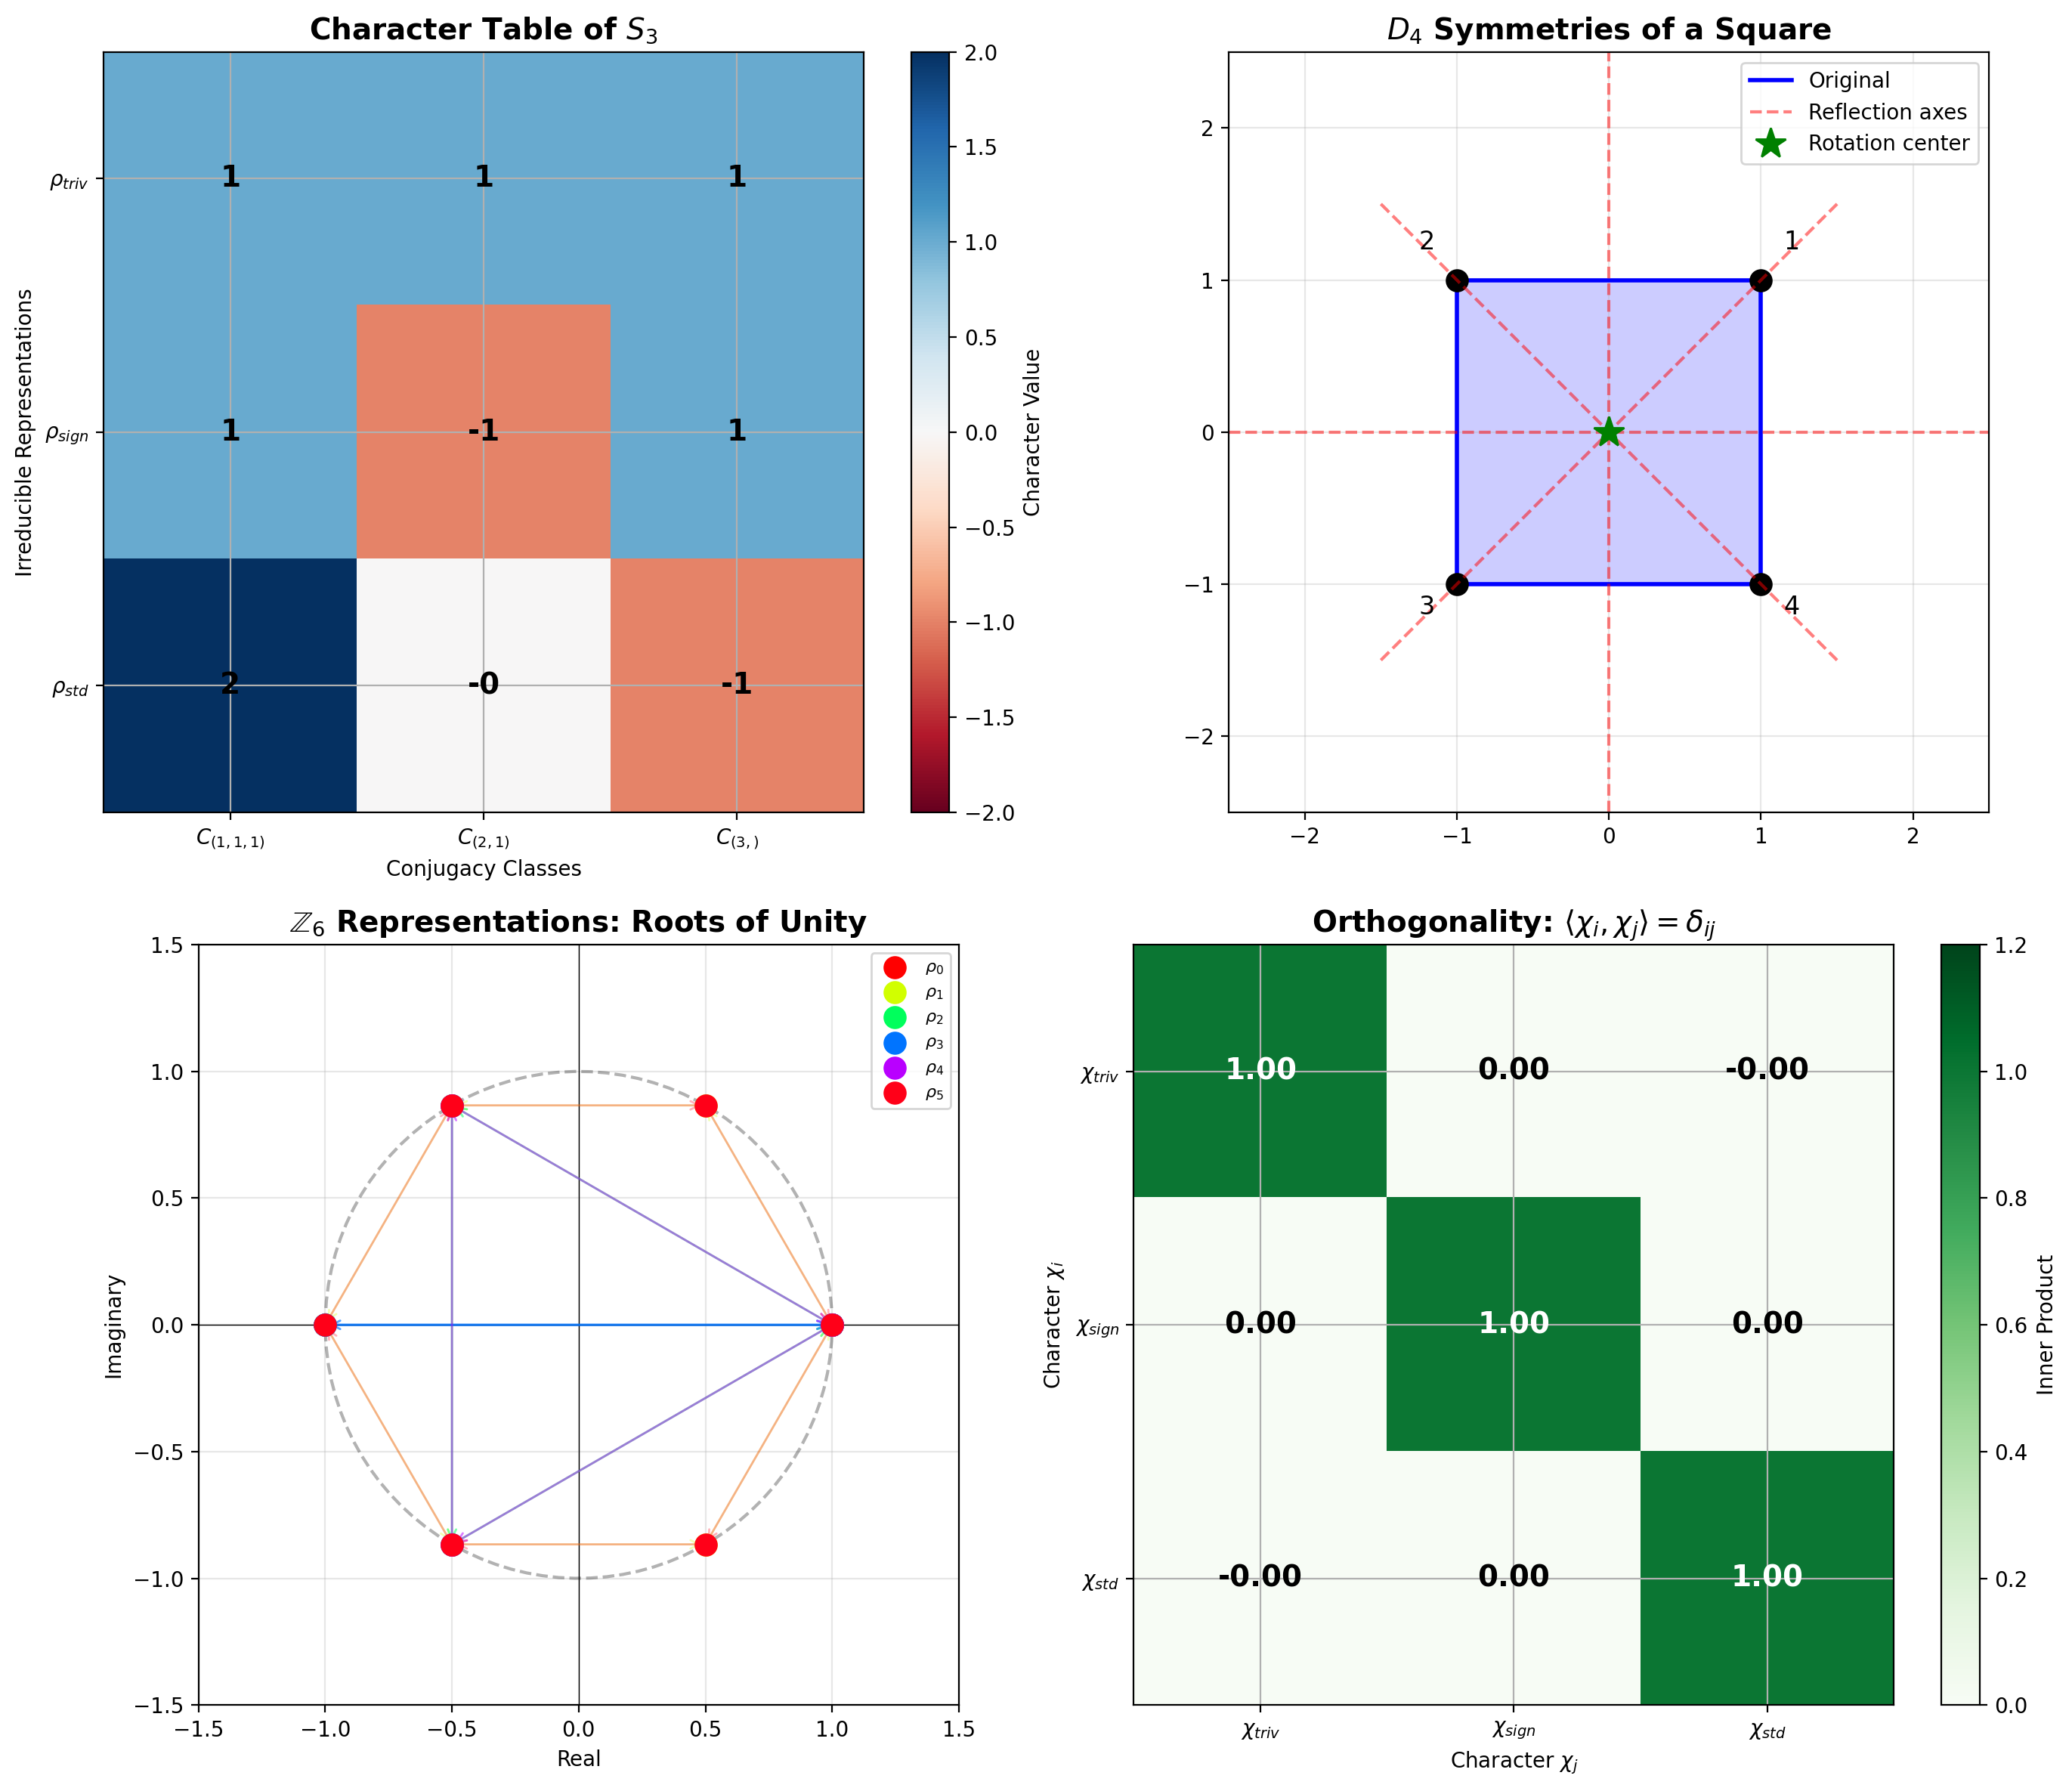


Plot saved to 'plot.png'


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. S_3 Character Table Heatmap
ax1 = axes[0, 0]
im1 = ax1.imshow(char_table, cmap='RdBu', aspect='auto', vmin=-2, vmax=2)
ax1.set_xticks(range(len(classes)))
ax1.set_xticklabels([f"$C_{{{S3.cycle_type(list(c)[0])}}}$" for c in classes])
ax1.set_yticks(range(char_table.shape[0]))
ax1.set_yticklabels(['$\\rho_{triv}$', '$\\rho_{sign}$', '$\\rho_{std}$'])
ax1.set_title('Character Table of $S_3$', fontsize=14, fontweight='bold')
ax1.set_xlabel('Conjugacy Classes')
ax1.set_ylabel('Irreducible Representations')

# Add values as text
for i in range(char_table.shape[0]):
    for j in range(char_table.shape[1]):
        ax1.text(j, i, f'{char_table[i,j]:.0f}', ha='center', va='center', 
                fontsize=14, fontweight='bold')

plt.colorbar(im1, ax=ax1, label='Character Value')

# 2. D_4 Action on Square
ax2 = axes[0, 1]
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.set_aspect('equal')
ax2.set_title('$D_4$ Symmetries of a Square', fontsize=14, fontweight='bold')

# Draw original square
square_vertices = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1], [1, 1]])
ax2.plot(square_vertices[:, 0], square_vertices[:, 1], 'b-', linewidth=2, label='Original')
ax2.fill(square_vertices[:-1, 0], square_vertices[:-1, 1], alpha=0.2, color='blue')

# Mark vertices
for i, (x, y) in enumerate(square_vertices[:-1]):
    ax2.plot(x, y, 'ko', markersize=10)
    ax2.annotate(f'{i+1}', (x*1.2, y*1.2), fontsize=12, ha='center')

# Draw rotation and reflection axes
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Reflection axes')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax2.plot([-1.5, 1.5], [-1.5, 1.5], 'r--', alpha=0.5)
ax2.plot([-1.5, 1.5], [1.5, -1.5], 'r--', alpha=0.5)

# Draw rotation center
ax2.plot(0, 0, 'g*', markersize=15, label='Rotation center')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cyclic Group Representations (Roots of Unity)
ax3 = axes[1, 0]
n_cyclic = 6
theta = np.linspace(0, 2*np.pi, 100)
ax3.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3)

colors = plt.cm.hsv(np.linspace(0, 1, n_cyclic))
for k in range(n_cyclic):
    # Plot the k-th roots
    roots = [np.exp(2j * np.pi * k * j / n_cyclic) for j in range(n_cyclic)]
    x = [r.real for r in roots]
    y = [r.imag for r in roots]
    ax3.scatter(x, y, c=[colors[k]], s=100, label=f'$\\rho_{k}$', zorder=5)
    
    # Connect points for each representation
    if k > 0:
        for j in range(n_cyclic):
            ax3.annotate('', xy=(x[(j+1)%n_cyclic], y[(j+1)%n_cyclic]),
                        xytext=(x[j], y[j]),
                        arrowprops=dict(arrowstyle='->', color=colors[k], alpha=0.3))

ax3.set_xlim(-1.5, 1.5)
ax3.set_ylim(-1.5, 1.5)
ax3.set_aspect('equal')
ax3.set_title('$\mathbb{Z}_6$ Representations: Roots of Unity', fontsize=14, fontweight='bold')
ax3.set_xlabel('Real')
ax3.set_ylabel('Imaginary')
ax3.legend(loc='upper right', fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# 4. Orthogonality Matrix for S_3
ax4 = axes[1, 1]
im4 = ax4.imshow(np.abs(row_orth), cmap='Greens', aspect='auto', vmin=0, vmax=1.2)
ax4.set_xticks(range(row_orth.shape[1]))
ax4.set_xticklabels(['$\\chi_{triv}$', '$\\chi_{sign}$', '$\\chi_{std}$'])
ax4.set_yticks(range(row_orth.shape[0]))
ax4.set_yticklabels(['$\\chi_{triv}$', '$\\chi_{sign}$', '$\\chi_{std}$'])
ax4.set_title('Orthogonality: $\langle\chi_i, \chi_j\\rangle = \delta_{ij}$', 
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Character $\chi_j$')
ax4.set_ylabel('Character $\chi_i$')

# Add values
for i in range(row_orth.shape[0]):
    for j in range(row_orth.shape[1]):
        color = 'white' if row_orth[i,j] > 0.5 else 'black'
        ax4.text(j, i, f'{row_orth[i,j]:.2f}', ha='center', va='center', 
                fontsize=14, fontweight='bold', color=color)

plt.colorbar(im4, ax=ax4, label='Inner Product')

plt.tight_layout()
plt.savefig('group_representation_theory_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Applications of Representation Theory

Group representation theory has profound applications across mathematics and physics:

### 1. Quantum Mechanics
- Symmetry groups of Hamiltonians determine degeneracy of energy levels
- Angular momentum theory relies on representations of $SO(3)$ and $SU(2)$
- Selection rules arise from character orthogonality

### 2. Crystallography
- Point groups classify crystal symmetries
- Character tables determine allowed vibrational modes
- Space groups describe full crystal symmetry

### 3. Chemistry
- Molecular orbital theory uses representations of molecular symmetry groups
- Spectroscopic selection rules follow from representation theory
- Ligand field theory employs $d$-orbital representations

### 4. Particle Physics
- The Standard Model is built on gauge symmetries $SU(3) \times SU(2) \times U(1)$
- Particle multiplets correspond to irreducible representations
- Flavor symmetry uses $SU(3)$ representations

In [12]:
# Summary statistics
print("="*60)
print("SUMMARY: Group Representation Theory")
print("="*60)

print("\n1. Symmetric Group S_3:")
print(f"   - Order: {S3.order}")
print(f"   - Conjugacy classes: {len(classes)}")
print(f"   - Irreducible representations: 3 (dims: 1, 1, 2)")
print(f"   - Dimension check: 1² + 1² + 2² = 6 ✓")

print("\n2. Cyclic Group Z_6:")
print(f"   - Order: {Z6.order}")
print(f"   - Conjugacy classes: {Z6.order} (abelian)")
print(f"   - Irreducible representations: 6 (all 1-dimensional)")
print(f"   - Representations given by ω^{'{kj}'} where ω = e^{{2πi/6}}")

print("\n3. Dihedral Group D_4:")
print(f"   - Order: {D4.order}")
print(f"   - Conjugacy classes: {len(D4_classes)}")
print(f"   - Irreducible representations: 5 (dims: 1, 1, 1, 1, 2)")
print(f"   - Dimension check: 1² + 1² + 1² + 1² + 2² = 8 ✓")

print("\n" + "="*60)
print("Key Results Verified:")
print("  ✓ Representation homomorphism property")
print("  ✓ First orthogonality relation (row orthogonality)")
print("  ✓ Second orthogonality relation (column orthogonality)")
print("  ✓ Dimension sum formula: Σd_i² = |G|")
print("="*60)

SUMMARY: Group Representation Theory

1. Symmetric Group S_3:
   - Order: 6
   - Conjugacy classes: 3
   - Irreducible representations: 3 (dims: 1, 1, 2)
   - Dimension check: 1² + 1² + 2² = 6 ✓

2. Cyclic Group Z_6:
   - Order: 6
   - Conjugacy classes: 6 (abelian)
   - Irreducible representations: 6 (all 1-dimensional)
   - Representations given by ω^{kj} where ω = e^{2πi/6}

3. Dihedral Group D_4:
   - Order: 8
   - Conjugacy classes: 5
   - Irreducible representations: 5 (dims: 1, 1, 1, 1, 2)
   - Dimension check: 1² + 1² + 1² + 1² + 2² = 8 ✓

Key Results Verified:
  ✓ Representation homomorphism property
  ✓ First orthogonality relation (row orthogonality)
  ✓ Second orthogonality relation (column orthogonality)
  ✓ Dimension sum formula: Σd_i² = |G|
